*Nama : Vania Noverina*

*NIM : 2311110031*

*Kelas : SD04B*

# Import Library*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.stats import shapiro

# Sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Statmodels
import statsmodels
import statsmodels.api as sm

# Import Dataset

In [2]:
# Import dataset Agriculture
agriculture = pd.read_csv('agriculture.csv')
agriculture

,Farm_ID,Crop_Type,Farm_Area(acres),Irrigation_Type,Fertilizer_Used(tons),Pesticide_Used(kg),Yield(tons),Soil_Type,Season,Water_Usage(cubic meters)
0,F001,Cotton,329.40,Sprinkler,8.14,2.21,14.44,Loamy,Kharif,76648.20
1,F002,Carrot,18.67,Manual,4.77,4.36,42.91,Peaty,Kharif,68725.54
2,F003,Sugarcane,306.03,Flood,2.91,0.56,33.44,Silty,Kharif,75538.56
3,F004,Tomato,380.21,Rain-fed,3.32,4.35,34.08,Silty,Zaid,45401.23
4,F005,Tomato,135.56,Sprinkler,8.33,4.48,43.28,Clay,Zaid,93718.69
5,F006,Sugarcane,12.50,Sprinkler,6.42,2.25,38.18,Loamy,Zaid,46487.98
6,F007,Soybean,360.06,Drip,1.83,2.37,44.93,Sandy,Rabi,40583.57
7,F008,Rice,464.60,Drip,5.18,0.91,4.23,Silty,Kharif,9392.38
8,F009,Maize,389.37,Drip,0.57,4.93,3.86,Peaty,Rabi,60202.14
9,F010,Soybean,184.37,Drip,2.18,2.67,17.25,Sandy,Kharif,90922.15


# Exploratory Data Analysis (EDA) & Data Preprocessing

### Melihat informasi data

In [3]:
# Mengecek informasi dataframe
agriculture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Farm_ID                    50 non-null     object 
 1   Crop_Type                  50 non-null     object 
 2   Farm_Area(acres)           50 non-null     float64
 3   Irrigation_Type            50 non-null     object 
 4   Fertilizer_Used(tons)      50 non-null     float64
 5   Pesticide_Used(kg)         50 non-null     float64
 6   Yield(tons)                50 non-null     float64
 7   Soil_Type                  50 non-null     object 
 8   Season                     50 non-null     object 
 9   Water_Usage(cubic meters)  50 non-null     float64
dtypes: float64(5), object(5)
memory usage: 4.0+ KB


In [4]:
# Melihat statistik deskriptif dari data (cuma yang numerik)
agriculture.describe().T

,count,mean,std,min,25%,50%,75%,max
Farm_Area(acres),50.0,254.9638,139.417782,12.50,135.7100,281.980,368.1075,483.88
Fertilizer_Used(tons),50.0,4.9054,2.732689,0.50,2.4375,5.045,6.8850,9.96
Pesticide_Used(kg),50.0,2.3980,1.438613,0.14,0.9725,2.330,3.4175,4.99
Yield(tons),50.0,27.0592,13.345789,3.86,16.1900,28.970,37.8600,48.02
Water_Usage(cubic meters),50.0,56724.2956,27264.992053,5869.75,37818.1525,54097.075,82240.0325,94754.73


### Mencari duplikat data

In [5]:
# Mencari apakah ada data yang terduplikasi / sama
duplicate = agriculture[agriculture.duplicated()]
duplicate

,Farm_ID,Crop_Type,Farm_Area(acres),Irrigation_Type,Fertilizer_Used(tons),Pesticide_Used(kg),Yield(tons),Soil_Type,Season,Water_Usage(cubic meters)


In [6]:
# Mencari apakah ada data yang terduplikasi / sama
agriculture.duplicated().sum()

0

Tidak ada data yang terduplikasi.

In [7]:
# Mengecek ukuran data
agriculture.shape

(50, 10)

### Mencari missing values

In [8]:
# Mencari apakah ada missing value
agriculture.isna().sum()

Farm_ID                      0
Crop_Type                    0
Farm_Area(acres)             0
Irrigation_Type              0
Fertilizer_Used(tons)        0
Pesticide_Used(kg)           0
Yield(tons)                  0
Soil_Type                    0
Season                       0
Water_Usage(cubic meters)    0
dtype: int64

Tidak ada nilai yang kosong/ hilang pada data.

### Mencari unique value

In [9]:
# Menghitung unique value pada setiap kolom dataframe
agriculture.nunique()

Farm_ID                      50
Crop_Type                    10
Farm_Area(acres)             50
Irrigation_Type               5
Fertilizer_Used(tons)        49
Pesticide_Used(kg)           46
Yield(tons)                  50
Soil_Type                     5
Season                        3
Water_Usage(cubic meters)    50
dtype: int64

### Mengganti tipe data

Menghilangkan kolom "Farm_ID" dari dataframe

In [10]:
# Mengahpus kolom Farm_ID dari dataset
agriculture.drop(['Farm_ID'], axis=1, inplace=True)
agriculture

,Crop_Type,Farm_Area(acres),Irrigation_Type,Fertilizer_Used(tons),Pesticide_Used(kg),Yield(tons),Soil_Type,Season,Water_Usage(cubic meters)
0,Cotton,329.40,Sprinkler,8.14,2.21,14.44,Loamy,Kharif,76648.20
1,Carrot,18.67,Manual,4.77,4.36,42.91,Peaty,Kharif,68725.54
2,Sugarcane,306.03,Flood,2.91,0.56,33.44,Silty,Kharif,75538.56
3,Tomato,380.21,Rain-fed,3.32,4.35,34.08,Silty,Zaid,45401.23
4,Tomato,135.56,Sprinkler,8.33,4.48,43.28,Clay,Zaid,93718.69
5,Sugarcane,12.50,Sprinkler,6.42,2.25,38.18,Loamy,Zaid,46487.98
6,Soybean,360.06,Drip,1.83,2.37,44.93,Sandy,Rabi,40583.57
7,Rice,464.60,Drip,5.18,0.91,4.23,Silty,Kharif,9392.38
8,Maize,389.37,Drip,0.57,4.93,3.86,Peaty,Rabi,60202.14
9,Soybean,184.37,Drip,2.18,2.67,17.25,Sandy,Kharif,90922.15


In [11]:
# Memilih kolom-kolom yang bertipe object lalu menyimpannya kedalam variable 'kategorikal'
kategorikal = agriculture.select_dtypes(include='object').columns
kategorikal

Index(['Crop_Type', 'Irrigation_Type', 'Soil_Type', 'Season'], dtype='object')

In [12]:
agriculture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Crop_Type                  50 non-null     object 
 1   Farm_Area(acres)           50 non-null     float64
 2   Irrigation_Type            50 non-null     object 
 3   Fertilizer_Used(tons)      50 non-null     float64
 4   Pesticide_Used(kg)         50 non-null     float64
 5   Yield(tons)                50 non-null     float64
 6   Soil_Type                  50 non-null     object 
 7   Season                     50 non-null     object 
 8   Water_Usage(cubic meters)  50 non-null     float64
dtypes: float64(5), object(4)
memory usage: 3.6+ KB


### Encoding

In [13]:
# Mengubah kolom bertipe object (variable kategorik) ke numerik
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in kategorikal:
    agriculture[i] = le.fit_transform(agriculture[i])

In [14]:
agriculture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Crop_Type                  50 non-null     int32  
 1   Farm_Area(acres)           50 non-null     float64
 2   Irrigation_Type            50 non-null     int32  
 3   Fertilizer_Used(tons)      50 non-null     float64
 4   Pesticide_Used(kg)         50 non-null     float64
 5   Yield(tons)                50 non-null     float64
 6   Soil_Type                  50 non-null     int32  
 7   Season                     50 non-null     int32  
 8   Water_Usage(cubic meters)  50 non-null     float64
dtypes: float64(5), int32(4)
memory usage: 2.9 KB


In [15]:
agriculture.head()

,Crop_Type,Farm_Area(acres),Irrigation_Type,Fertilizer_Used(tons),Pesticide_Used(kg),Yield(tons),Soil_Type,Season,Water_Usage(cubic meters)
0,2,329.40,4,8.14,2.21,14.44,1,0,76648.20
1,1,18.67,2,4.77,4.36,42.91,2,0,68725.54
2,7,306.03,1,2.91,0.56,33.44,4,0,75538.56
3,8,380.21,3,3.32,4.35,34.08,4,2,45401.23
4,8,135.56,4,8.33,4.48,43.28,0,2,93718.69


### Unduh CSV data

In [16]:
# Menyimpan dan mengunduh data yang sudah di cleaning
agriculture.to_csv('agriculture_clean.csv', index=False)

# Asumsi Analisis Regresi

## Uji Normalitas

### Uji Normalitas Menggunakan Histogram

C:\Users\Asus\AppData\Local\Temp\ipykernel_70224\3169269460.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(agriculture["Farm_Area(acres)"], ax=axes[0, 0])
C:\Users\Asus\AppData\Local\Temp\ipykernel_70224\3169269460.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(agriculture["Fertilizer_

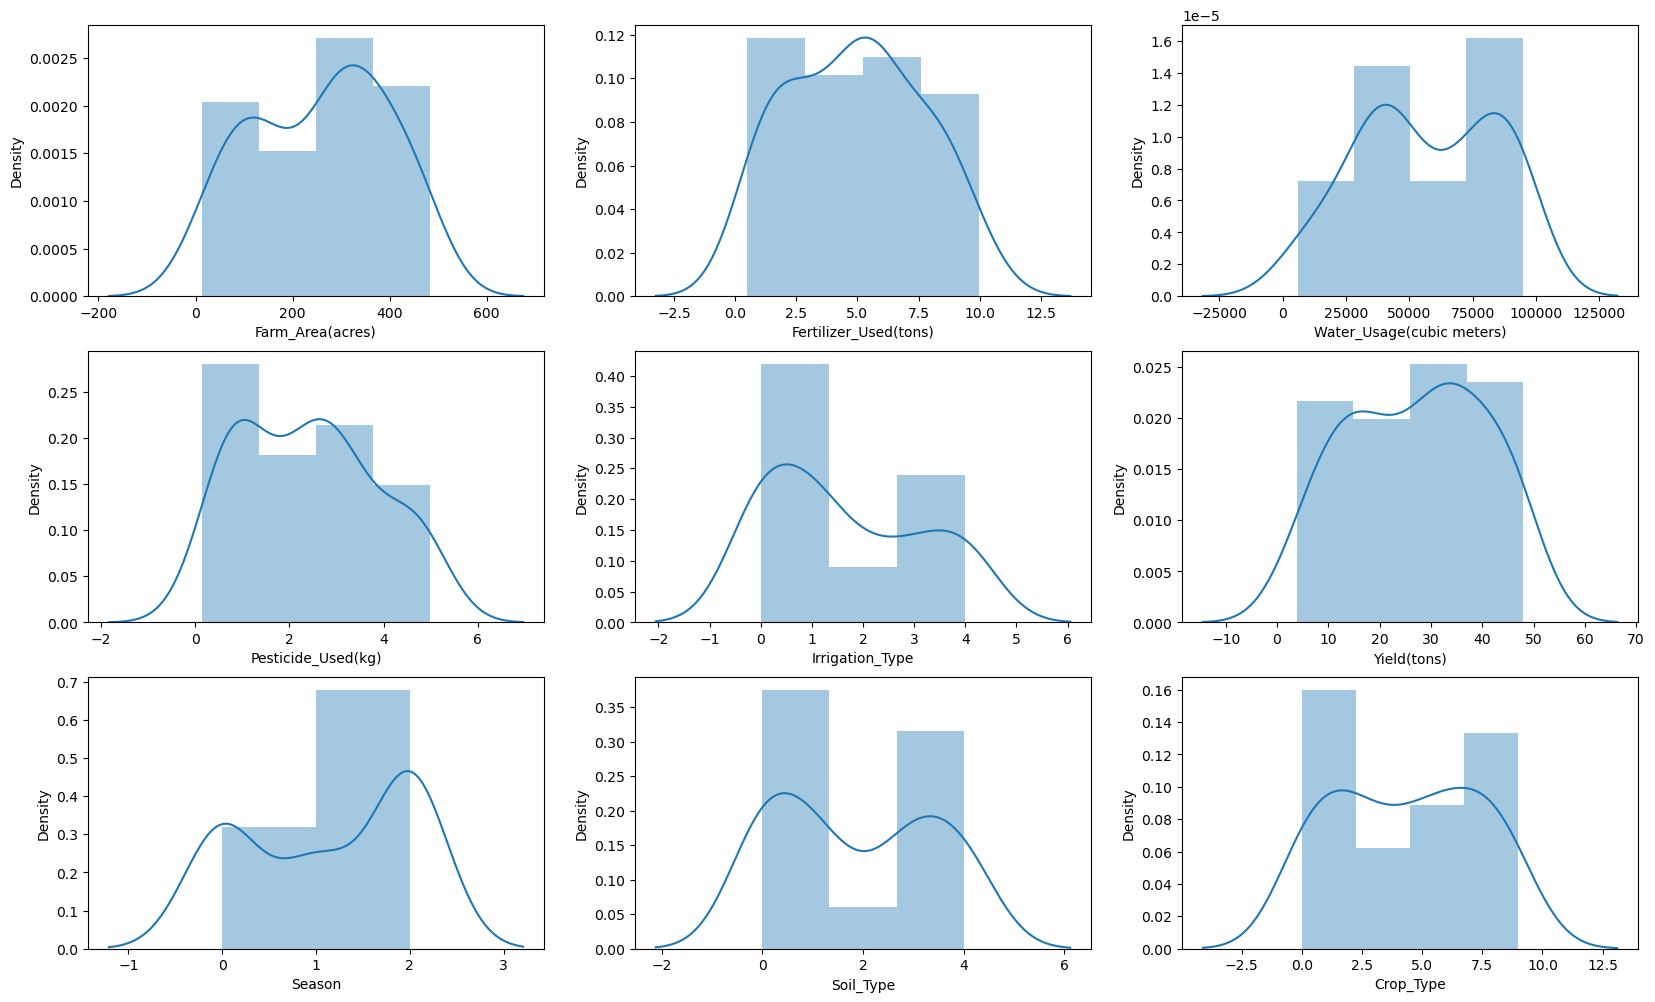

In [17]:
# Mengecek normalitas data dengan histogram
fig, axes = plt.subplots(3, 3, figsize=(20, 12))

sns.distplot(agriculture["Farm_Area(acres)"], ax=axes[0, 0])
sns.distplot(agriculture["Fertilizer_Used(tons)"], ax=axes[0, 1])
sns.distplot(agriculture["Water_Usage(cubic meters)"], ax=axes[0, 2])
sns.distplot(agriculture["Pesticide_Used(kg)"], ax=axes[1, 0])
sns.distplot(agriculture["Irrigation_Type"], ax=axes[1, 1])
sns.distplot(agriculture["Yield(tons)"], ax=axes[1, 2])
sns.distplot(agriculture["Season"], ax=axes[2, 0])
sns.distplot(agriculture["Soil_Type"], ax=axes[2, 1])
sns.distplot(agriculture["Crop_Type"], ax=axes[2, 2])
plt.show()

## Uji Normalitas dengan Q-Q Plot

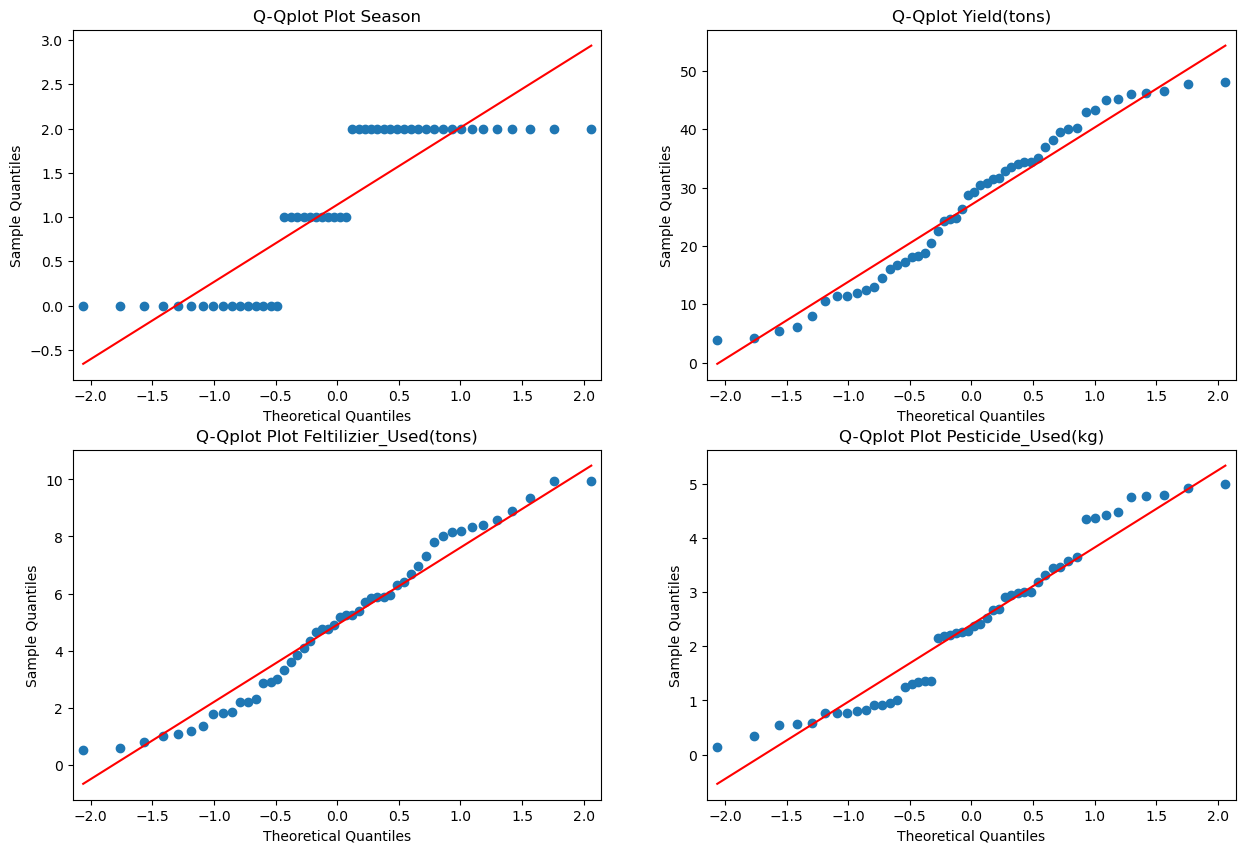

In [22]:
# Cek normalitas data dengan Q-Q plot
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sm.graphics.qqplot(agriculture["Season"].dropna(), line='s', ax=axes[0, 0])
axes[0, 0].title.set_text('Q-Qplot Plot Season')

sm.graphics.qqplot(agriculture["Yield(tons)"].dropna(), line='s', ax=axes[0, 1])
axes[0, 1].title.set_text('Q-Qplot Yield(tons)')

sm.graphics.qqplot(agriculture["Fertilizer_Used(tons)"].dropna(), line='s', ax=axes[1, 0])
axes[1, 0].title.set_text('Q-Qplot Plot Feltilizier_Used(tons)')

sm.graphics.qqplot(agriculture["Pesticide_Used(kg)"].dropna(), line='s', ax=axes[1, 1])
axes[1, 1].title.set_text('Q-Qplot Plot Pesticide_Used(kg)')

plt.show()

### Uji Normalitas Menggunakan Boxplot

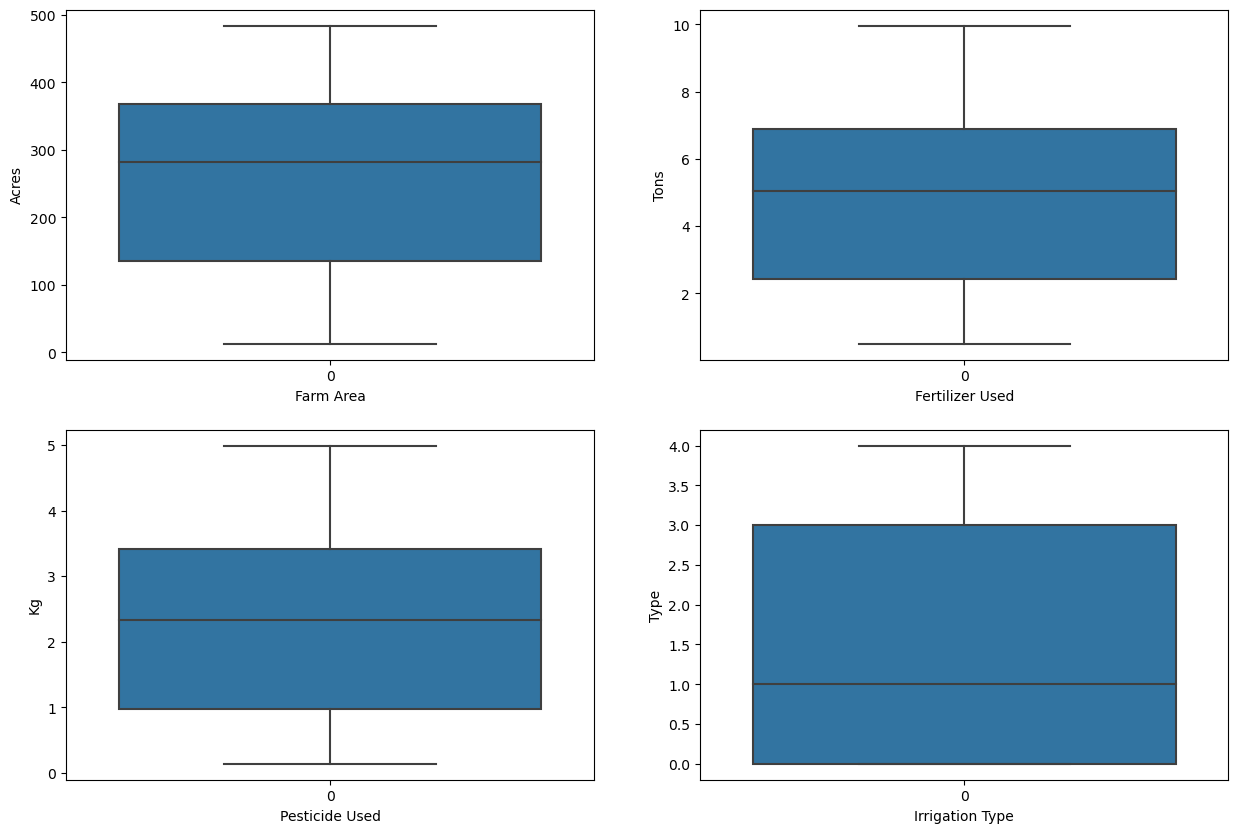

In [24]:
# Mengecek normalitas data dengan boxplot
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.boxplot(agriculture["Farm_Area(acres)"], ax=axes[0, 0], showfliers=True)
axes[0,0].set_xlabel("Farm Area")
axes[0,0].set_ylabel("Acres")

sns.boxplot(agriculture["Fertilizer_Used(tons)"], ax=axes[0, 1], showfliers=True)
axes[0,1].set_xlabel("Fertilizer Used")
axes[0,1].set_ylabel("Tons")

sns.boxplot(agriculture["Pesticide_Used(kg)"], ax=axes[1, 0], showfliers=True)
axes[1,0].set_xlabel("Pesticide Used")
axes[1,0].set_ylabel("Kg")

sns.boxplot(agriculture["Irrigation_Type"], ax=axes[1, 1], showfliers=True)
axes[1,1].set_xlabel("Irrigation Type")
axes[1,1].set_ylabel("Type")

plt.show()

### Uji Normalitas Menggunakan Uji Shapiro-Wilk

In [25]:
# Cek Normalitas dengan Uji Shapiro-Wilk
column = agriculture.columns

for i in column:
    stat, p = shapiro(agriculture[i])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    
    # Pengujian Hipotesis
    alpha = 0.05
    if p > alpha:
        print('Gagal Tolak H0, {} berdistribusi normal'.format(i))
    else:
        print('Tolak H0, {} tidak berdistribusi normal'.format(i))

Statistics=0.923, p=0.003
Tolak H0, Crop_Type tidak berdistribusi normal
Statistics=0.948, p=0.029
Tolak H0, Farm_Area(acres) tidak berdistribusi normal
Statistics=0.848, p=0.000
Tolak H0, Irrigation_Type tidak berdistribusi normal
Statistics=0.960, p=0.088
Gagal Tolak H0, Fertilizer_Used(tons) berdistribusi normal
Statistics=0.937, p=0.010
Tolak H0, Pesticide_Used(kg) tidak berdistribusi normal
Statistics=0.950, p=0.034
Tolak H0, Yield(tons) tidak berdistribusi normal
Statistics=0.848, p=0.000
Tolak H0, Soil_Type tidak berdistribusi normal
Statistics=0.749, p=0.000
Tolak H0, Season tidak berdistribusi normal
Statistics=0.932, p=0.007
Tolak H0, Water_Usage(cubic meters) tidak berdistribusi normal


### Uji Linearitas

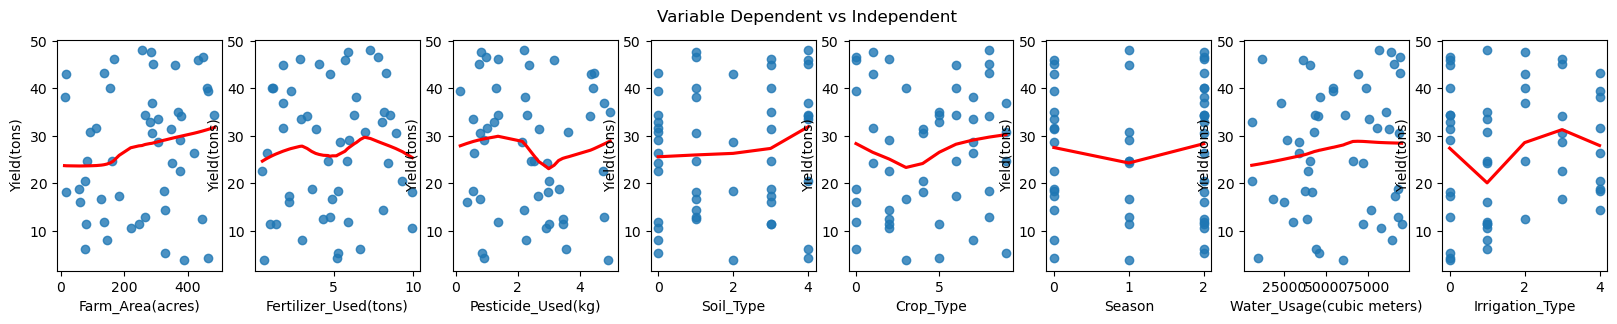

In [26]:
# Keterkaitan x dengan y
fig, axes = plt.subplots(1, 8, figsize=(20, 3))
fig.suptitle('Variable Dependent vs Independent')

sns.regplot(x=agriculture["Farm_Area(acres)"], y=agriculture["Yield(tons)"], lowess=True, line_kws={'color': 'red'}, ax=axes[0])
sns.regplot(x=agriculture["Fertilizer_Used(tons)"], y=agriculture["Yield(tons)"], lowess=True, line_kws={'color': 'red'}, ax=axes[1])
sns.regplot(x=agriculture["Pesticide_Used(kg)"], y=agriculture["Yield(tons)"], lowess=True, line_kws={'color': 'red'}, ax=axes[2])
sns.regplot(x=agriculture["Soil_Type"], y=agriculture["Yield(tons)"], lowess=True, line_kws={'color': 'red'}, ax=axes[3])
sns.regplot(x=agriculture["Crop_Type"], y=agriculture["Yield(tons)"], lowess=True, line_kws={'color': 'red'}, ax=axes[4])
sns.regplot(x=agriculture["Season"], y=agriculture["Yield(tons)"], lowess=True, line_kws={'color': 'red'}, ax=axes[5])
sns.regplot(x=agriculture["Water_Usage(cubic meters)"], y=agriculture["Yield(tons)"], lowess=True, line_kws={'color': 'red'}, ax=axes[6])
sns.regplot(x=agriculture["Irrigation_Type"], y=agriculture["Yield(tons)"], lowess=True, line_kws={'color': 'red'}, ax=axes[7])
plt.show()

### Uji Multikolinearitas

<Axes: >

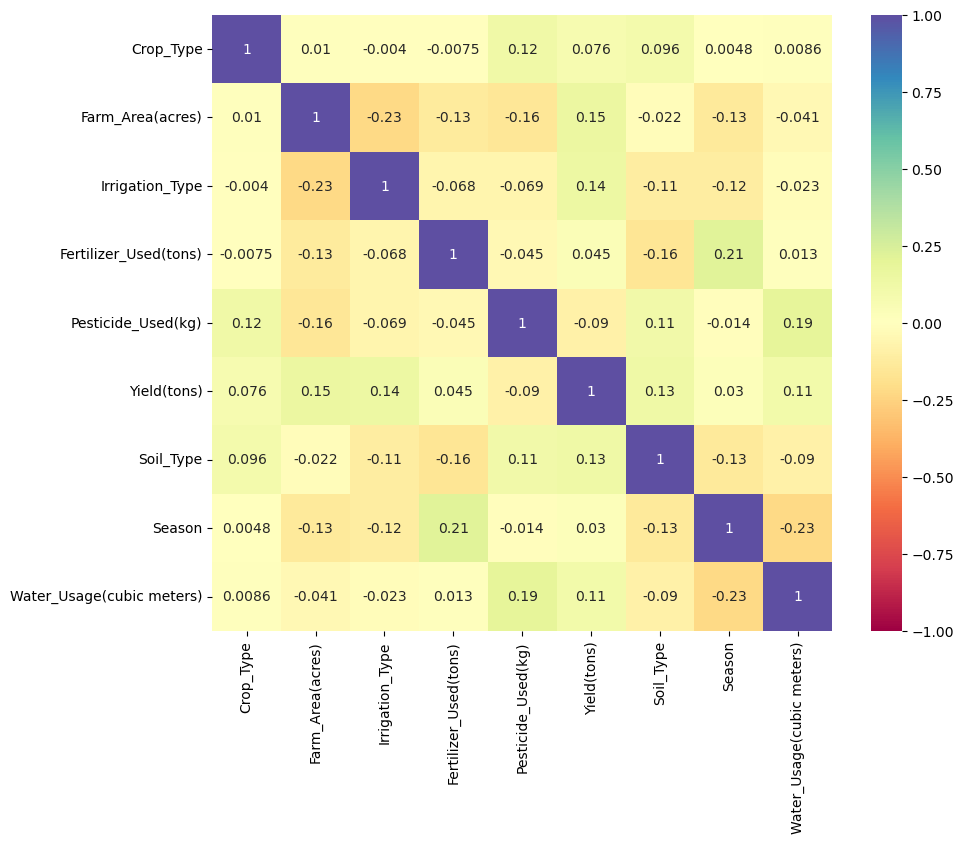

In [27]:
plt.figure(figsize=(10,8))
sns.heatmap(agriculture.corr(), vmax=1, vmin=-1, center=0, cmap="Spectral", annot=True)

In [28]:
# Cek Urutan korelasi terendah ke tertinggi
korelasi = agriculture.corr()["Yield(tons)"].sort_values()
korelasi

Pesticide_Used(kg)          -0.090393
Season                       0.029886
Fertilizer_Used(tons)        0.045090
Crop_Type                    0.075513
Water_Usage(cubic meters)    0.108361
Soil_Type                    0.126846
Irrigation_Type              0.141374
Farm_Area(acres)             0.153366
Yield(tons)                  1.000000
Name: Yield(tons), dtype: float64

In [29]:
# Cek Urutan korelasi terendah ke tertinggi
korelasi = agriculture.corr()["Season"].sort_values()
korelasi

Water_Usage(cubic meters)   -0.225105
Farm_Area(acres)            -0.134543
Soil_Type                   -0.133301
Irrigation_Type             -0.115917
Pesticide_Used(kg)          -0.013947
Crop_Type                    0.004798
Yield(tons)                  0.029886
Fertilizer_Used(tons)        0.212229
Season                       1.000000
Name: Season, dtype: float64

# Scaling

In [30]:
# Scale data
scaler = StandardScaler()
scaled_agriculture = scaler.fit_transform(agriculture)
scaled_agriculture

array([[-7.89513946e-01,  5.39328025e-01,  1.59459459e+00,
         1.19568657e+00, -1.32008151e-01, -9.55156455e-01,
        -5.49783433e-01, -1.30732570e+00,  7.38169396e-01],
       [-1.12691307e+00, -1.71206844e+00,  2.43243243e-01,
        -5.00513083e-02,  1.37765953e+00,  1.19975862e+00,
         1.04720654e-01, -1.30732570e+00,  4.44639322e-01],
       [ 8.97481665e-01,  3.70000521e-01, -4.32432432e-01,
        -7.37609901e-01, -1.29059032e+00,  4.82967408e-01,
         1.41372883e+00, -1.30732570e+00,  6.97057862e-01],
       [ 1.23488079e+00,  9.07472248e-01,  9.18918919e-01,
        -5.86051286e-01,  1.37063782e+00,  5.31409475e-01,
         1.41372883e+00,  9.86228156e-01, -4.19513180e-01],
       [ 1.23488079e+00, -8.65141096e-01,  1.59459459e+00,
         1.26592105e+00,  1.46192005e+00,  1.22776419e+00,
        -1.20428752e+00,  9.86228156e-01,  1.37062140e+00],
       [ 8.97481665e-01, -1.75677322e+00,  1.59459459e+00,
         5.59879701e-01, -1.03921310e-01,  8.417414

In [31]:
# Membuat dataframe dari hasil scalling
scaled_agriculture = pd.DataFrame(scaled_agriculture, columns=agriculture.columns)
scaled_agriculture

,Crop_Type,Farm_Area(acres),Irrigation_Type,Fertilizer_Used(tons),Pesticide_Used(kg),Yield(tons),Soil_Type,Season,Water_Usage(cubic meters)
0,-0.789514,0.539328,1.594595,1.195687,-0.132008,-0.955156,-0.549783,-1.307326,0.738169
1,-1.126913,-1.712068,0.243243,-0.050051,1.377660,1.199759,0.104721,-1.307326,0.444639
2,0.897482,0.370001,-0.432432,-0.737610,-1.290590,0.482967,1.413729,-1.307326,0.697058
3,1.234881,0.907472,0.918919,-0.586051,1.370638,0.531409,1.413729,0.986228,-0.419513
4,1.234881,-0.865141,1.594595,1.265921,1.461920,1.227764,-1.204288,0.986228,1.370621
5,0.897482,-1.756773,1.594595,0.559880,-0.103921,0.841741,-0.549783,0.986228,-0.379250
6,0.560083,0.761475,-1.108108,-1.136837,-0.019661,1.352654,0.759225,-0.160549,-0.598005
7,0.222683,1.518921,-1.108108,0.101507,-1.044830,-1.727959,1.413729,-1.307326,-1.753621
8,-0.452115,0.973841,-1.108108,-1.602603,1.777897,-1.755964,0.104721,-0.160549,0.128852
9,0.560083,-0.511488,-1.108108,-1.007458,0.190991,-0.742466,0.759225,-1.307326,1.267011


#### Variable sebelum dan sesudah scaling

C:\Users\Asus\AppData\Local\Temp\ipykernel_70224\3041291531.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(agriculture["Farm_Area(acres)"], ax=axes[0, 0])
C:\Users\Asus\AppData\Local\Temp\ipykernel_70224\3041291531.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scaled_agriculture["Farm

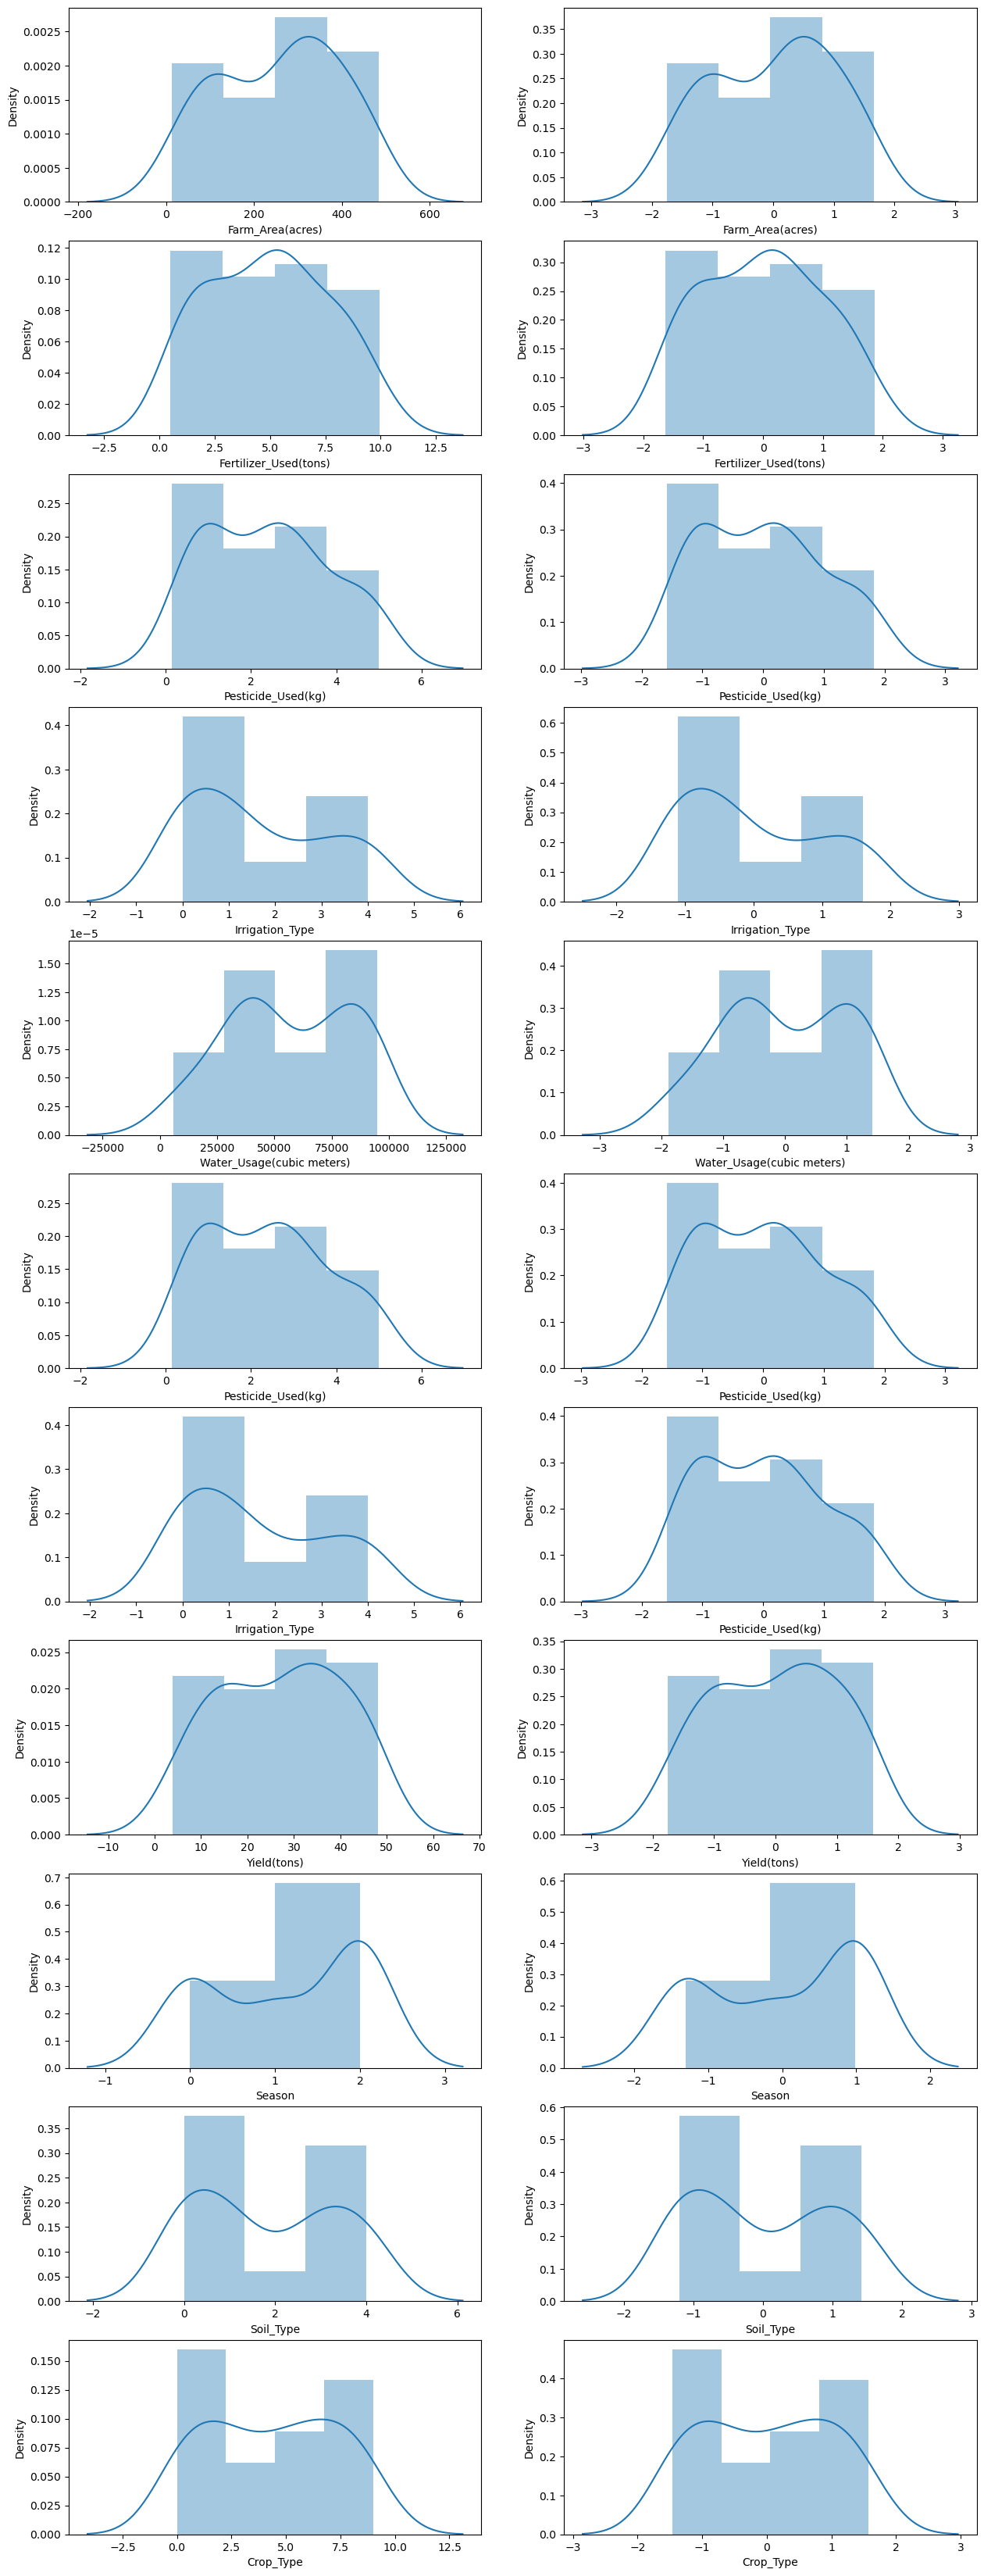

In [32]:
# Plot variabel sebelum dan sesudah scaling
fig, axes = plt.subplots(11, 2, figsize=(15, 42))

sns.distplot(agriculture["Farm_Area(acres)"], ax=axes[0, 0])
sns.distplot(scaled_agriculture["Farm_Area(acres)"], ax=axes[0, 1])
sns.distplot(agriculture["Fertilizer_Used(tons)"], ax=axes[1, 0])
sns.distplot(scaled_agriculture["Fertilizer_Used(tons)"], ax=axes[1, 1])
sns.distplot(agriculture["Pesticide_Used(kg)"], ax=axes[2, 0])
sns.distplot(scaled_agriculture["Pesticide_Used(kg)"], ax=axes[2, 1])
sns.distplot(agriculture["Irrigation_Type"], ax=axes[3, 0])
sns.distplot(scaled_agriculture["Irrigation_Type"], ax=axes[3, 1])
sns.distplot(agriculture["Water_Usage(cubic meters)"], ax=axes[4, 0])
sns.distplot(scaled_agriculture["Water_Usage(cubic meters)"], ax=axes[4, 1])
sns.distplot(agriculture["Pesticide_Used(kg)"], ax=axes[5, 0])
sns.distplot(scaled_agriculture["Pesticide_Used(kg)"], ax=axes[5, 1])
sns.distplot(agriculture["Irrigation_Type"], ax=axes[6, 0])
sns.distplot(scaled_agriculture["Pesticide_Used(kg)"], ax=axes[6, 1])
sns.distplot(agriculture["Yield(tons)"], ax=axes[7, 0])
sns.distplot(scaled_agriculture["Yield(tons)"], ax=axes[7, 1])
sns.distplot(agriculture["Season"], ax=axes[8, 0])
sns.distplot(scaled_agriculture["Season"], ax=axes[8, 1])
sns.distplot(agriculture["Soil_Type"], ax=axes[9, 0])
sns.distplot(scaled_agriculture["Soil_Type"], ax=axes[9, 1])
sns.distplot(agriculture["Crop_Type"], ax=axes[10, 0])
sns.distplot(scaled_agriculture["Crop_Type"], ax=axes[10, 1])


plt.show()

# Model Regresi

## Train Test Spilt

In [33]:
X = scaled_agriculture.drop("Yield(tons)", axis=1).values
y = scaled_agriculture["Yield(tons)"].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [34]:
print("Ukuran X train ", len(X_train))
print("Ukuran X test ", len(X_test))
print("Ukuran y train ", len(y_train))
print("Ukuran y test ", len(y_test))

Ukuran X train  35
Ukuran X test  15
Ukuran y train  35
Ukuran y test  15


# Membangun model dengan package Statsmodels

In [35]:
# Masukkan intercepts secara manual
Input = sm.add_constant(X_train)

In [36]:
# Modelling dengan statsmodels
SimpleModel = sm.OLS(y_train, Input, missing='drop')
results = SimpleModel.fit()

In [37]:
# Print results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                 -0.146
Method:                 Least Squares   F-statistic:                    0.4593
Date:                Fri, 08 Nov 2024   Prob (F-statistic):              0.873
Time:                        08:21:38   Log-Likelihood:                -48.381
No. Observations:                  35   AIC:                             114.8
Df Residuals:                      26   BIC:                             128.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0223      0.196      0.114      0.9

In [38]:
print('coefficient of determination:', results.rsquared)
print('adjusted coefficient of determination:', results.rsquared_adj)
print('regression coefficients:', results.params)

coefficient of determination: 0.12381320282141972
adjusted coefficient of determination: -0.14578273477198955
regression coefficients: [ 0.02232491 -0.03562476  0.25975241  0.2544352   0.05528794  0.03486558
 -0.02521361  0.08846931  0.20438092]


In [39]:
# membuat list
list_columns = []

for i in agriculture.columns:
  if i != "Yield(tons)":
    list_columns.append(i)

In [40]:
list_columns

['Crop_Type',
 'Farm_Area(acres)',
 'Irrigation_Type',
 'Fertilizer_Used(tons)',
 'Pesticide_Used(kg)',
 'Soil_Type',
 'Season',
 'Water_Usage(cubic meters)']

In [41]:
# Membuat Prediksi Model
Input_test = sm.add_constant(X_test)
prediction_1 = results.predict(Input_test)

# Tampilkan dalam bentuk dataframe
agriculture_statsmod = pd.DataFrame(X_test, columns=list_columns)
agriculture_statsmod["actual_yield"] = y_test
agriculture_statsmod["prediction_yield"] = prediction_1
agriculture_statsmod.head()

,Crop_Type,Farm_Area(acres),Irrigation_Type,Fertilizer_Used(tons),Pesticide_Used(kg),Soil_Type,Season,Water_Usage(cubic meters),actual_yield,prediction_yield
0,1.572280,0.243132,0.243243,-1.151624,1.672571,1.413729,0.986228,-1.241758,0.744857,-0.116185
1,0.897482,-0.794425,-0.432432,-0.700644,-0.089878,-1.204288,-1.307326,1.194926,-1.436549,-0.208972
2,0.222683,0.181038,-1.108108,1.151328,-0.813114,-1.204288,0.986228,-1.884132,0.438310,-0.452685
3,0.897482,1.188453,1.594595,-1.524975,-1.276547,-1.204288,0.986228,-0.852826,-0.058221,0.519270
4,0.897482,0.370001,-0.432432,-0.737610,-1.290590,1.413729,-1.307326,0.697058,0.482967,-0.118181


### Uji Distribusi Residual

C:\Users\Asus\AppData\Local\Temp\ipykernel_70224\4065320489.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual, label="residual")


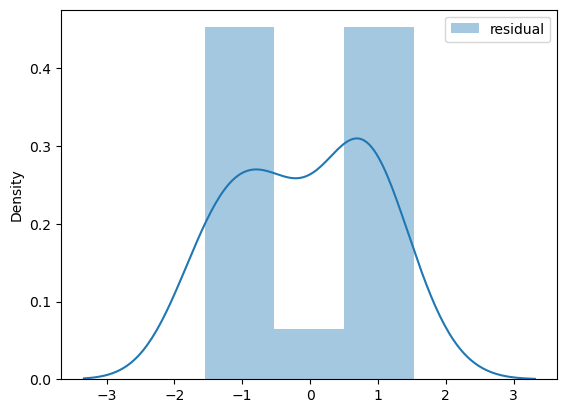

In [42]:
# Melihat distribusi residual
residual = agriculture_statsmod['actual_yield'] - agriculture_statsmod['prediction_yield']
sns.distplot(residual, label="residual")
plt.legend()
plt.show()

In [45]:
# Memasukkan residual kedalam dataframe
agriculture_statsmod["residual"] = residual
agriculture_statsmod.head()

,Crop_Type,Farm_Area(acres),Irrigation_Type,Fertilizer_Used(tons),Pesticide_Used(kg),Soil_Type,Season,Water_Usage(cubic meters),actual_yield,prediction_yield,residual
0,1.572280,0.243132,0.243243,-1.151624,1.672571,1.413729,0.986228,-1.241758,0.744857,-0.116185,0.861043
1,0.897482,-0.794425,-0.432432,-0.700644,-0.089878,-1.204288,-1.307326,1.194926,-1.436549,-0.208972,-1.227578
2,0.222683,0.181038,-1.108108,1.151328,-0.813114,-1.204288,0.986228,-1.884132,0.438310,-0.452685,0.890995
3,0.897482,1.188453,1.594595,-1.524975,-1.276547,-1.204288,0.986228,-0.852826,-0.058221,0.519270,-0.577492
4,0.897482,0.370001,-0.432432,-0.737610,-1.290590,1.413729,-1.307326,0.697058,0.482967,-0.118181,0.601149


C:\Users\Asus\AppData\Local\Temp\ipykernel_70224\3908260357.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(agriculture_statsmod['actual_yield'], label="Actual")
C:\Users\Asus\AppData\Local\Temp\ipykernel_70224\3908260357.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(agriculture_statsm

<function matplotlib.pyplot.show(close=None, block=None)>

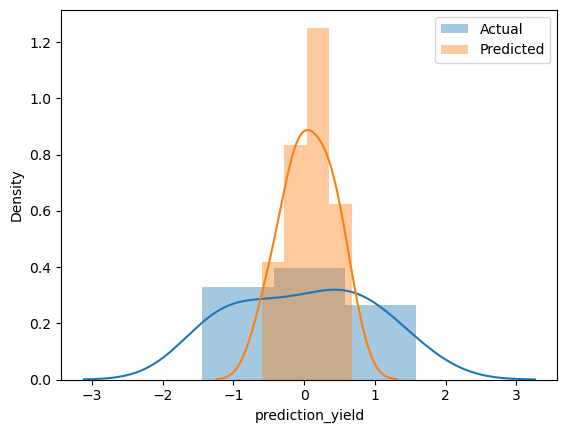

In [46]:
# Melihat perbedaan actual dan prediksi
sns.distplot(agriculture_statsmod['actual_yield'], label="Actual")
sns.distplot(agriculture_statsmod['prediction_yield'], label="Predicted")
plt.legend()
plt.show

### Asumsi Autokorelasi

In [47]:
statsmodels.stats.stattools.durbin_watson(results.resid, axis=0)

2.251932651088339

### Uji Homoskedasitas

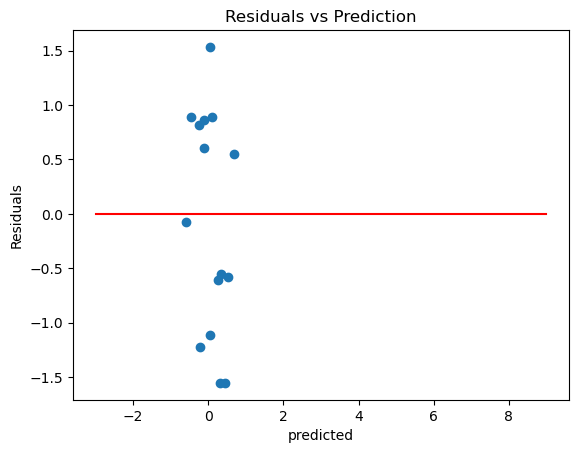

In [48]:
asm_homosk = plt.scatter(agriculture_statsmod['prediction_yield'], agriculture_statsmod["residual"])
plt.xlabel('predicted')
plt.ylabel('Residuals')
asm_homosk = sns.lineplot(x=[-3,9], y=[0,0],color='red')
asm_homosk = plt.title('Residuals vs Prediction')

## Evaluation Model

In [49]:
# R-square
print('R-square :', metrics.r2_score(agriculture_statsmod['actual_yield'], agriculture_statsmod['prediction_yield']))

R-square : -0.13349914039381416


In [50]:
# MSE
print('MSE :', metrics.mean_squared_error(agriculture_statsmod['actual_yield'], agriculture_statsmod['prediction_yield']))

MSE : 0.9729099739045513


## Uji Partial Regresi

Uji ini dilakukan untuk mengetahui apakah variabel independent(X) 
berpengaruh secara partial terhadap variable dependent(Y).

In [53]:
print(len(results.tvalues))

9


In [54]:
t_test_const, t_test_X1, t_test_X2, t_test_X3, t_test_X4, t_test_X5, t_test_X6, t_test_X7, t_test_X8 = results.tvalues

print("T-test score const: ", t_test_const)
print("T-test score X1: ", t_test_X1)
print("T-test score X2: ", t_test_X2)
print("T-test score X3: ", t_test_X3)
print("T-test score X4: ", t_test_X4)
print("T-test score X5: ", t_test_X5)
print("T-test score X6: ", t_test_X6)
print("T-test score X7: ", t_test_X7)
print("T-test score X8: ", t_test_X8)

T-test score const:  0.11391829658653846
T-test score X1:  -0.1872815149213996
T-test score X2:  1.2240952796332312
T-test score X3:  1.1974222740177825
T-test score X4:  0.24347596961700715
T-test score X5:  0.15327234217807031
T-test score X6:  -0.11104460357339836
T-test score X7:  0.42778597221959
T-test score X8:  1.013179238358713


In [55]:
p_value_const, p_value_X1, p_value_X2, p_value_X3, p_value_X4, p_value_X5, p_value_X6, p_value_X7, p_value_X8 = results.pvalues
print("P-value const: ", p_value_const)
print("P-value X1: ", p_value_X1)
print("P-value X2: ", p_value_X2)
print("P-value X3: ", p_value_X3)
print("P-value X4: ", p_value_X4)
print("P-value X5: ", p_value_X5)
print("P-value X6: ", p_value_X6)
print("P-value X7: ", p_value_X7)
print("P-value X8: ", p_value_X8)

P-value const:  0.9101776894265154
P-value X1:  0.8528937463010577
P-value X2:  0.23189317570707463
P-value X3:  0.24194534149036726
P-value X4:  0.8095475154584282
P-value X5:  0.8793669018095223
P-value X6:  0.9124337619820265
P-value X7:  0.6723295014095532
P-value X8:  0.32031097097582684


### Uji Kelayakan Model F-test

In [56]:
f_value = results.fvalue
print("f-test score : ", f_value)

p_value = results.f_pvalue
print("P-value : ", p_value)

if p_value < 0.05:
  print("Tolak H0")
else:
  print("Terima H0")

f-test score :  0.45925470512151584
P-value :  0.8732192363399187
Terima H0


Karena diperoleh nilai p-value >= 0.05 maka Ho diterima. 
Sehingga dapat disimpulkan bahwa model regresi dianggap tidak signifikan. 
Tidak ada cukup bukti untuk menyatakan bahwa variable independen 
secara signifikan mempengaruhi variable dependen